In [1]:
import osmnx as ox
import geopandas as gpd
import numpy as npm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from collections import deque
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CRS_PLOT = 'EPSG:4326'
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/exports'
ROUTE = 'B26'
COLUMNS = ['route', 'x', 'latitude', 'longitude', 'bus_id', 'datetime']

In [3]:
bus_df = pd.read_csv(f'{DATA_DIR}/MTA-Bus-2021-7-5.csv', names=COLUMNS)
bus_gdf = gpd.GeoDataFrame(bus_df, geometry=gpd.points_from_xy(bus_df['longitude'], bus_df['latitude'])).set_crs(CRS_PLOT)

In [4]:
b_gdf = bus_gdf[bus_gdf['route'].str.contains(ROUTE)]
b_gdf.head()

,route,x,latitude,longitude,bus_id,datetime,geometry
183,MTA NYCT_B26,1,40.682503,-73.943588,MTA NYCT_4407,Sun Jul 04 23:44:38 CST 2021,POINT (-73.94359 40.68250)
186,MTA NYCT_B26,0,40.695408,-73.987160,MTA NYCT_4442,Sun Jul 04 23:44:48 CST 2021,POINT (-73.98716 40.69541)
213,MTA NYCT_B26,0,40.682083,-73.960258,MTA NYCT_4447,Sun Jul 04 23:44:50 CST 2021,POINT (-73.96026 40.68208)
1007,MTA NYCT_B26,1,40.691322,-73.909714,MTA NYCT_7802,Sun Jul 04 23:44:46 CST 2021,POINT (-73.90971 40.69132)
1041,MTA NYCT_B26,0,40.699467,-73.910934,MTA NYCT_7819,Sun Jul 04 23:44:48 CST 2021,POINT (-73.91093 40.69947)


In [5]:
b_gdf = b_gdf[['bus_id', 'x', 'datetime', 'latitude', 'longitude', 'geometry']]
b_gdf['datetime'] = pd.to_datetime(b_gdf['datetime']) - datetime.timedelta(hours=12)

In [6]:
b_gdf = b_gdf.sort_values(by=['bus_id', 'datetime'])

In [7]:
b_gdf.to_csv(f'{EXPORTS_DIR}/{ROUTE.lower()}_all_trajectories.csv', index=False)

<AxesSubplot:>

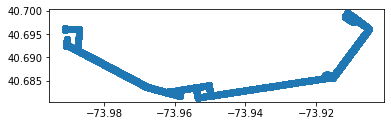

In [8]:
b_gdf.plot()